In [2]:
import os
import sys
new_path = '/stylegan_K1/'
sys.path.append(new_path)
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config
import io
import matplotlib.pyplot as plt

In [9]:
'''Loading Pre trained network'''
tflib.init_tf()
f = open('./network-snapshot-007440.pkl', 'rb')
_G, _D, Gs = pickle.load(f)

In [10]:
 #Gs.print_layers()

In [78]:
# Pick latent vector.
rnd = np.random.RandomState(100)
latents = rnd.randn(32, Gs.input_shape[1])

# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=1, randomize_noise=True, output_transform=fmt)
images = np.transpose(images,(0,3, 1, 2))
images.shape

(32, 3, 512, 512)

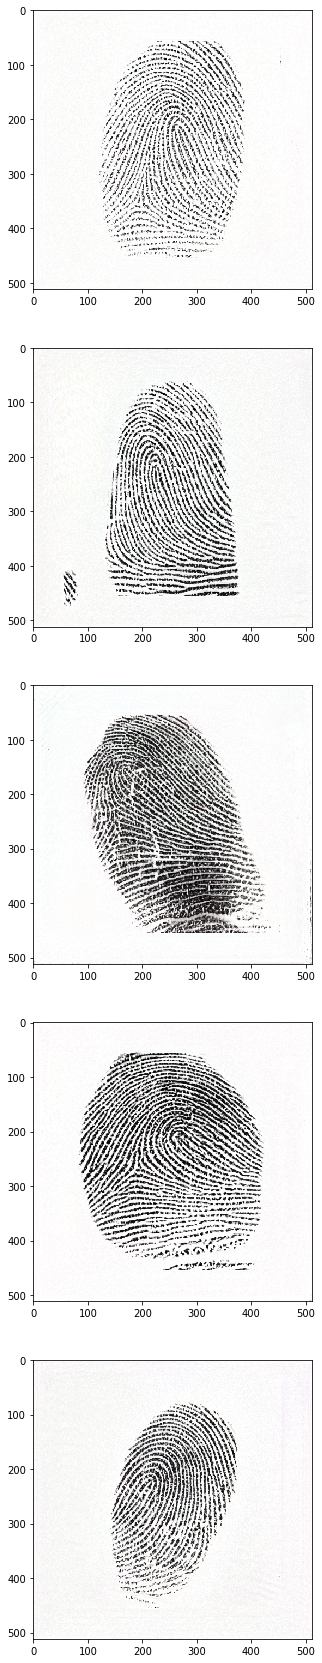

In [79]:
fig, ax = plt.subplots(5,1, figsize=(5,30))
for i in range(5):
    ax[i].imshow(np.transpose(np.squeeze(images[i,:,:,:]), (1,2,0)))